<a href="https://colab.research.google.com/github/BintangPray/MPDW_Peramalann/blob/main/Hyperparameter_Tuning_LSTM%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Impor Data

In [2]:
np.random.seed(7)

In [4]:
data = pd.read_excel("Residual.xlsx")
data = data.loc[:, ['Tanggal','Residual']]
data = data.iloc[:700].reset_index(drop=True)
print(data.head())
print(data.shape)

     Tanggal     Residual
0 2022-09-01    -0.000004
1 2022-09-02 -4310.000003
2 2022-09-03 -2150.000008
3 2022-09-04 -2620.000021
4 2022-09-05  -760.000019
(700, 2)


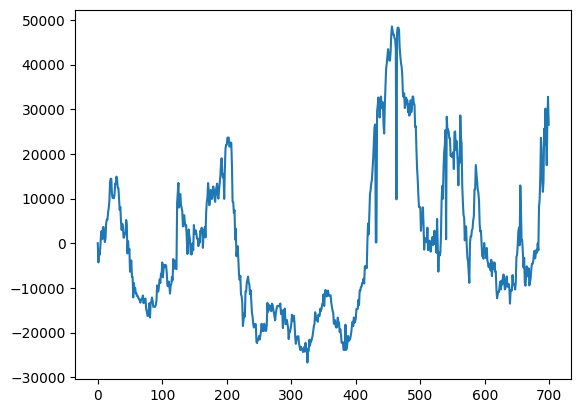

In [5]:
plt.plot(data['Residual'])

### Normalisasi Data

Proses normalisasi data dilakukan menggunakan metode _min-max normalization_ hingga menghasilkan data yang bersakala [0,1].

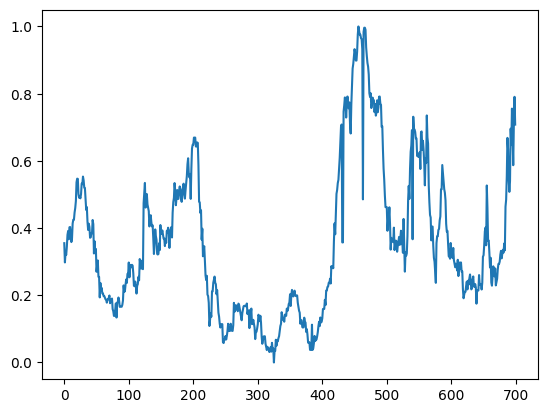

In [6]:
# Step 1: Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data['Residual_normalized'] = scaler.fit_transform(data['Residual'].values.reshape(-1, 1))
plt.plot(data['Residual_normalized'])

# Hyperparameter Tuning

_Hyperparameter tuning_ dilakukan untuk menentukan _hyperparameter_ terbaik melalui langkah validasi berupa _time series k-fold cross validation_. Banyaknya _fold_ yang digunakan dalam langkah validasi adalah sebanyak 5.

### Skenario 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


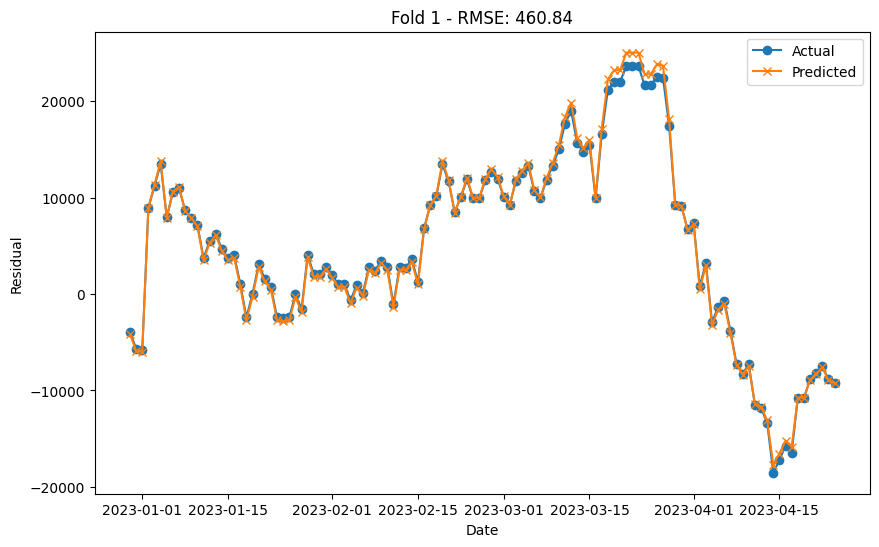

Fold 1 - RMSE: 460.84


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


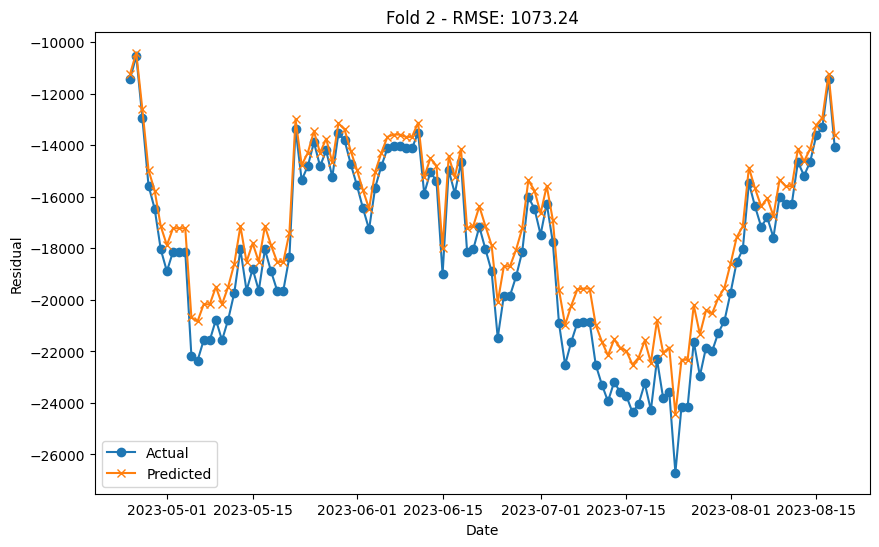

Fold 2 - RMSE: 1073.24


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


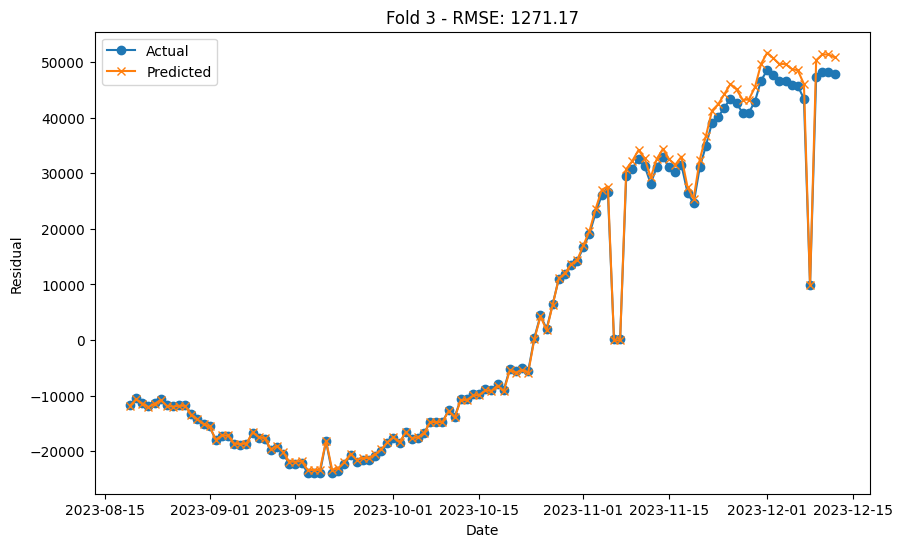

Fold 3 - RMSE: 1271.17


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


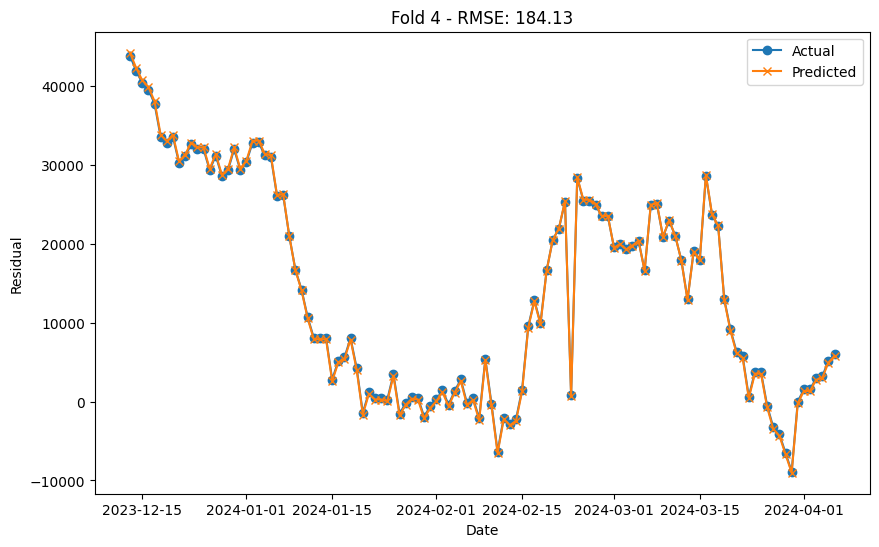

Fold 4 - RMSE: 184.13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


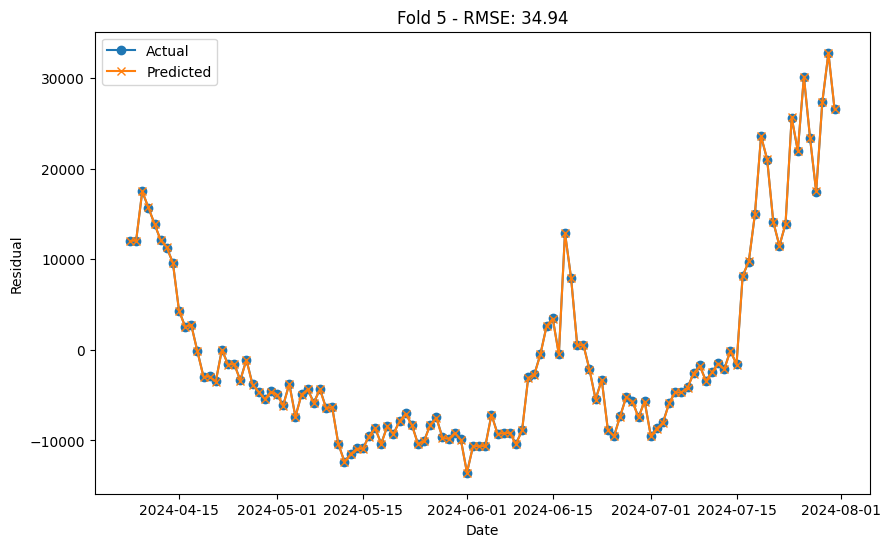

Fold 5 - RMSE: 34.94


In [7]:
#LEARNING RATE: 0,001 dan BATCH SIZE: 16

from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 100
neurons = 40
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

### Skenario 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


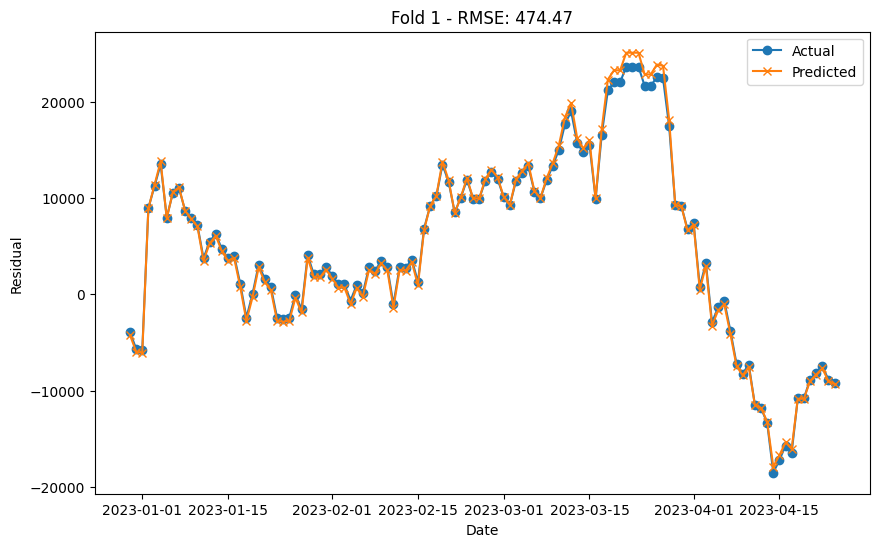

Fold 1 - RMSE: 474.47


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


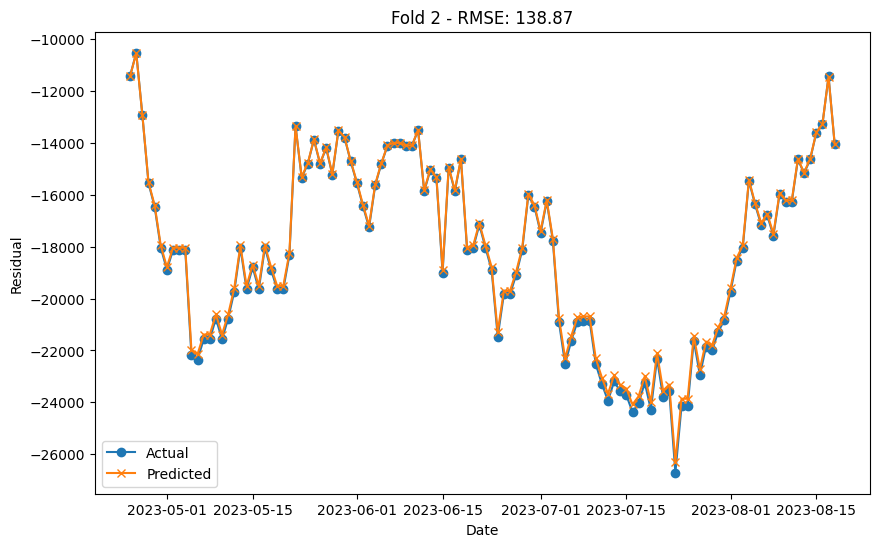

Fold 2 - RMSE: 138.87


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


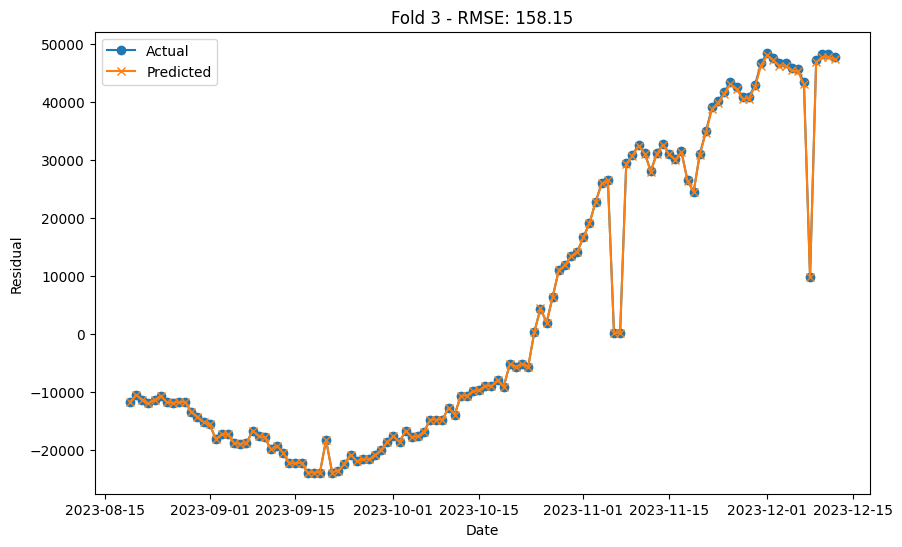

Fold 3 - RMSE: 158.15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


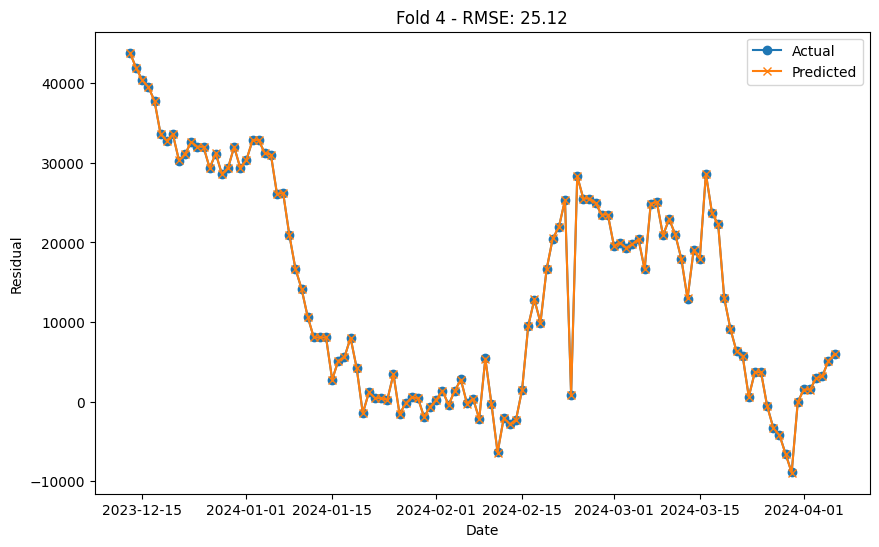

Fold 4 - RMSE: 25.12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


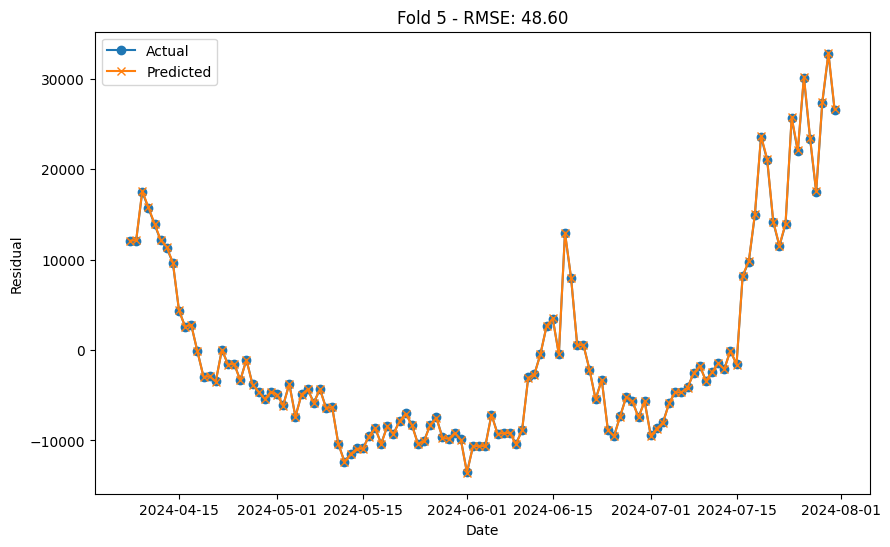

Fold 5 - RMSE: 48.60


In [8]:
#LEARNING RATE: 0,005 dan BATCH SIZE: 16

from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
learning_rate = 0.005
batch_size = 16
epochs = 100
neurons = 40
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

### Skenario 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


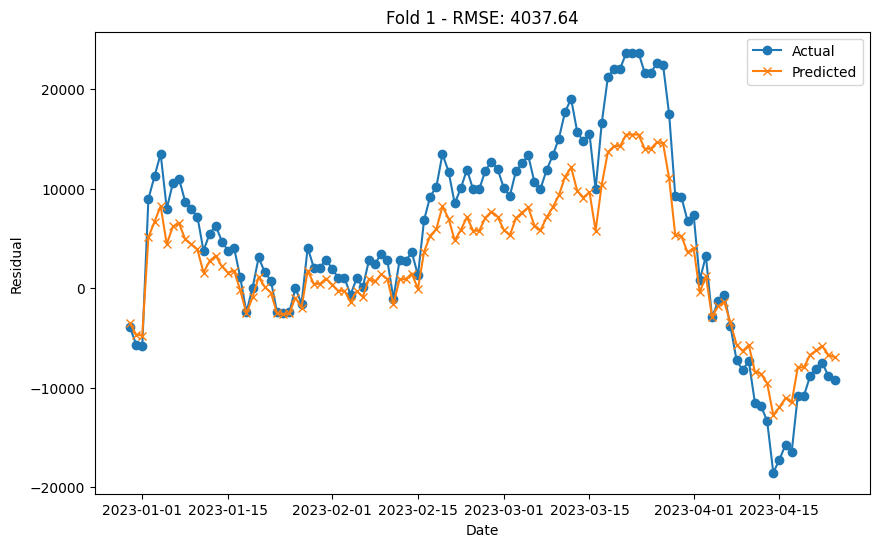

Fold 1 - RMSE: 4037.64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


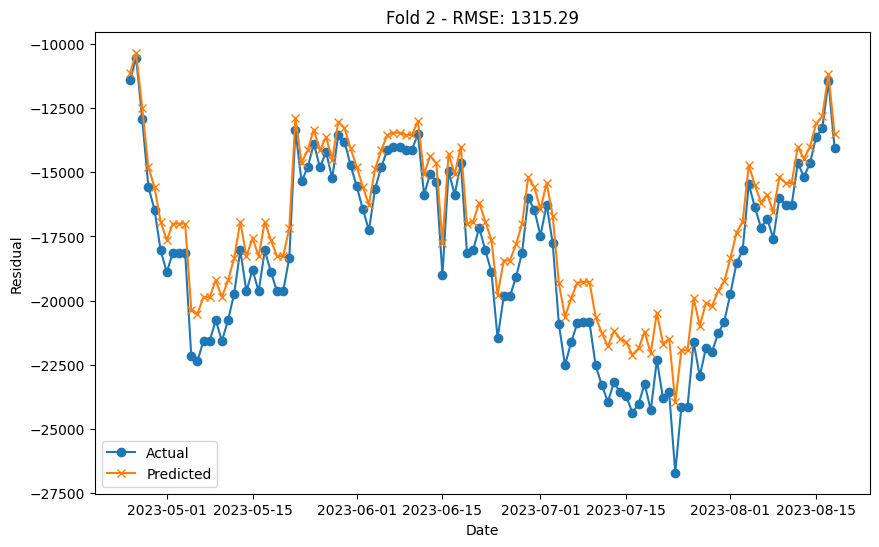

Fold 2 - RMSE: 1315.29


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


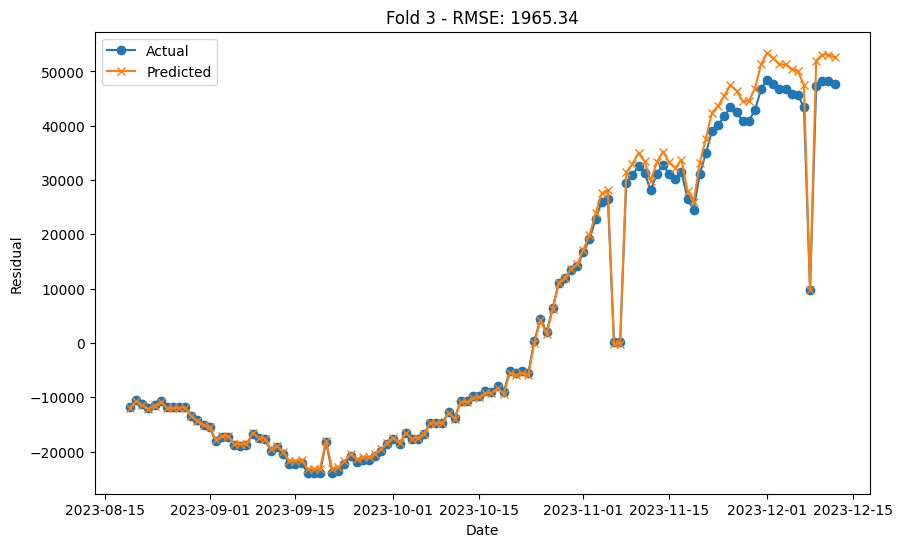

Fold 3 - RMSE: 1965.34


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


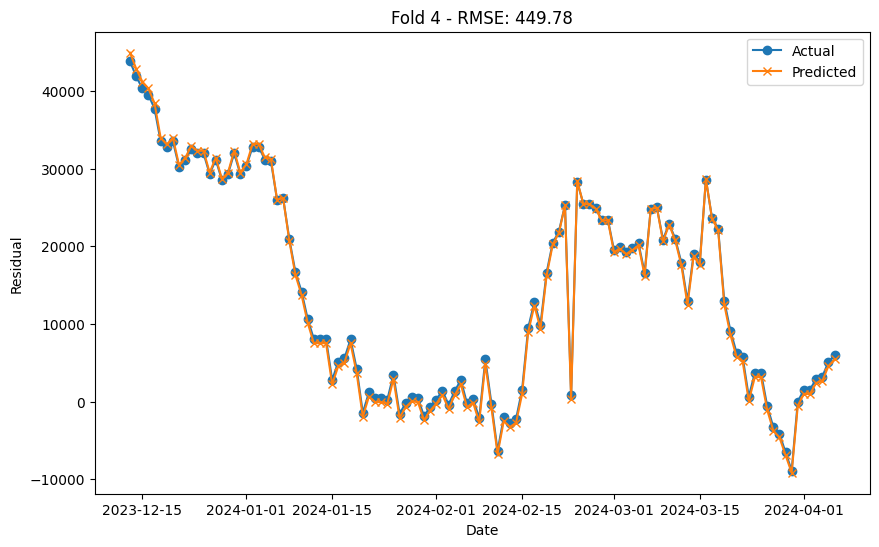

Fold 4 - RMSE: 449.78


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


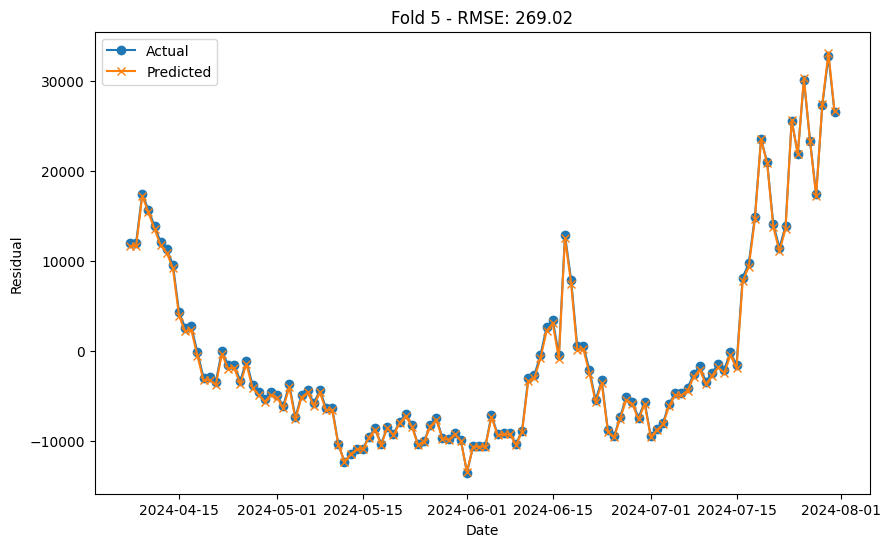

Fold 5 - RMSE: 269.02


In [9]:
#LEARNING RATE: 0,001 dan BATCH SIZE: 32

from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 100
neurons = 40
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

### Skenario 4

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


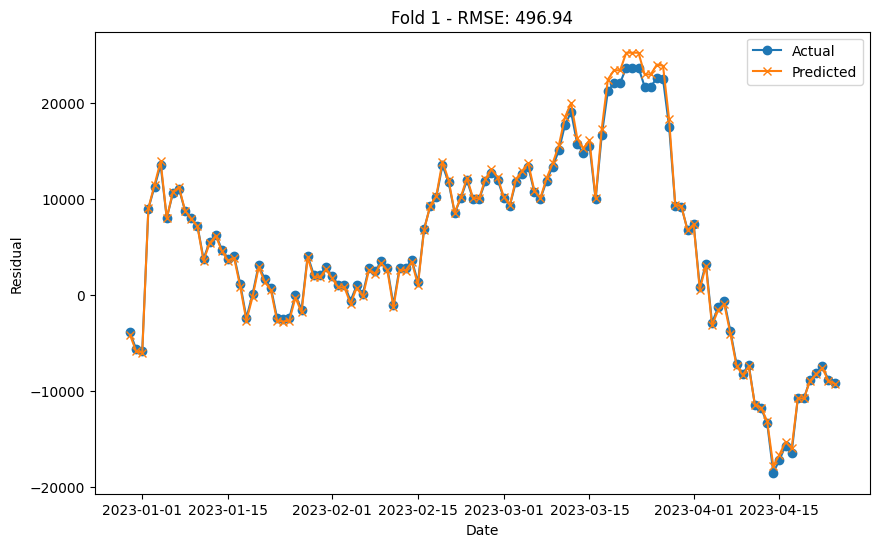

Fold 1 - RMSE: 496.94


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


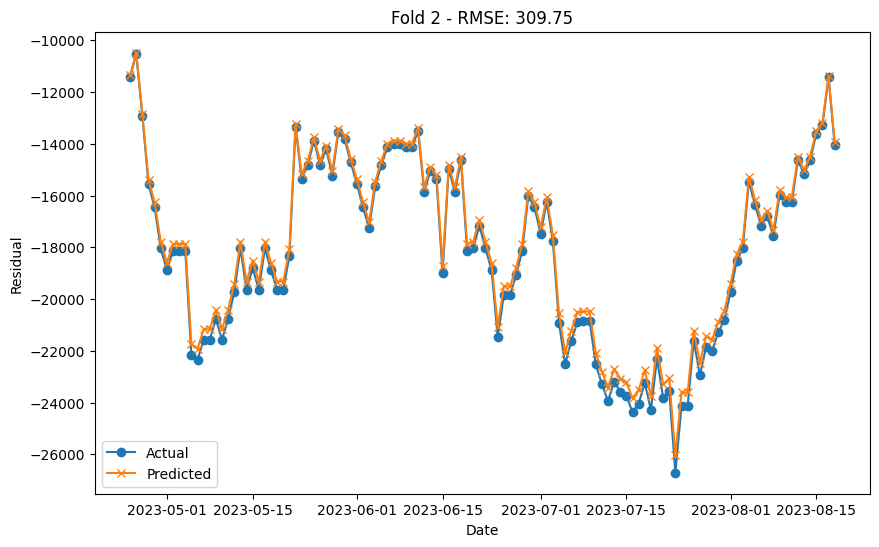

Fold 2 - RMSE: 309.75


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


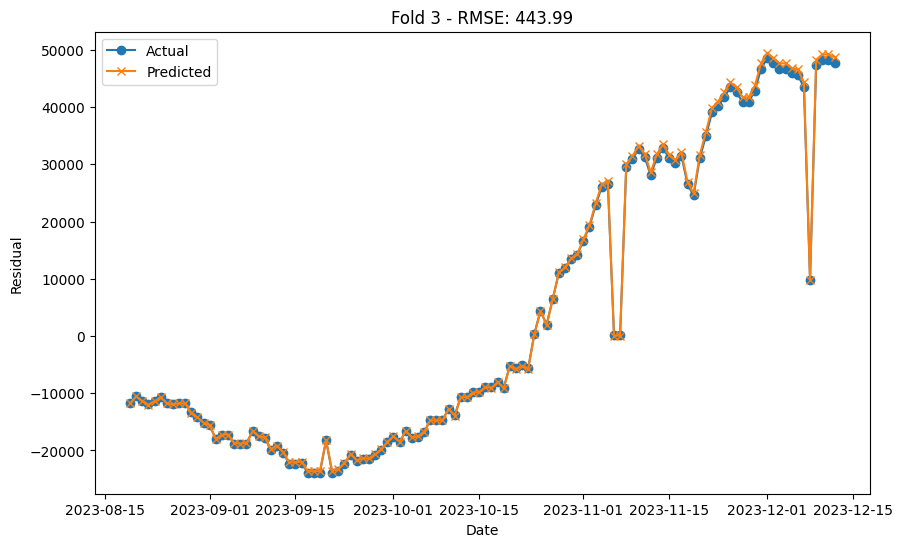

Fold 3 - RMSE: 443.99


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


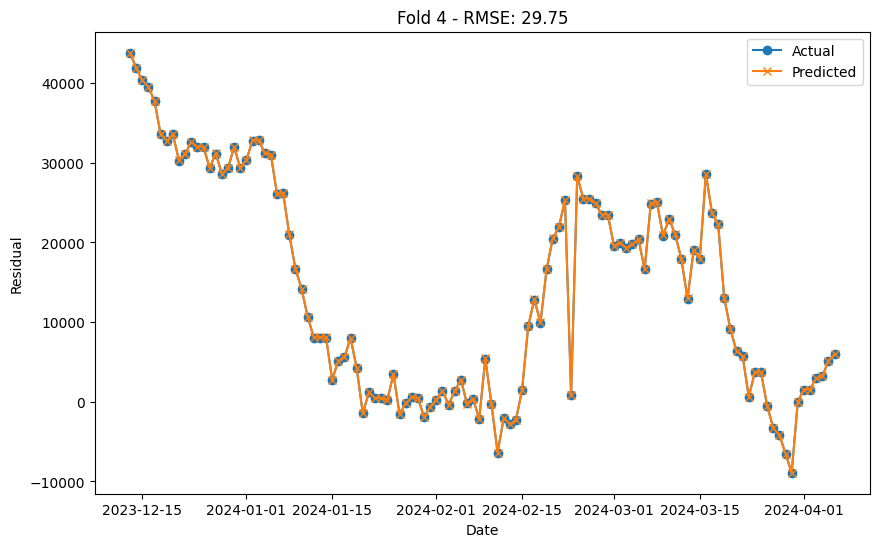

Fold 4 - RMSE: 29.75


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


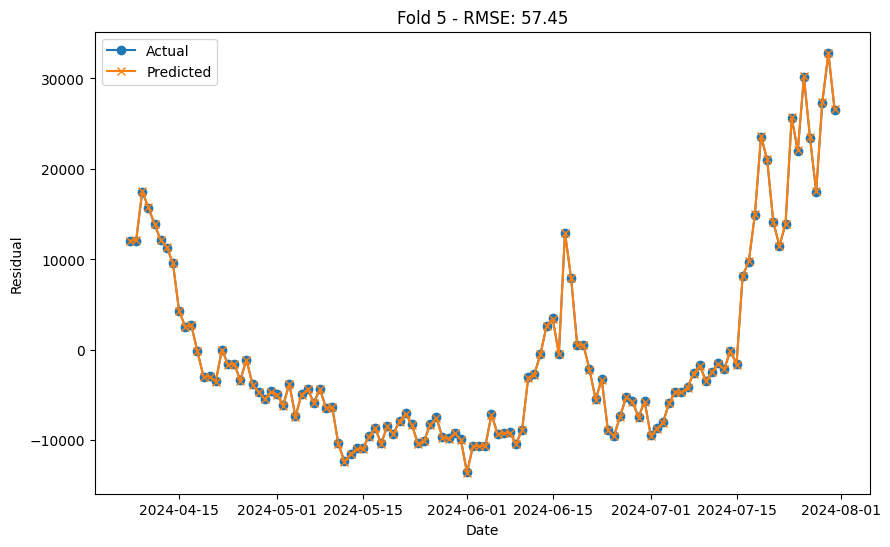

Fold 5 - RMSE: 57.45


In [10]:
#LEARNING RATE: 0,005 dan BATCH SIZE: 32

from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = 0.005
batch_size = 32
epochs = 100
neurons = 40
time_step = 30

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize list to store RMSE values for each fold
rmse_values = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(tscv.split(data['Residual_normalized'])):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    # Create and train LSTM model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)  # Inisialisasi optimizer dengan learning rate
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(train_data['Residual_normalized'].values.reshape(-1, 1),
              train_data['Residual_normalized'].values.reshape(-1, 1),
              epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(test_data['Residual_normalized'].values.reshape(-1, 1))
    denormalized_predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    actual_values = test_data['Residual'].values
    rmse = np.sqrt(mean_squared_error(actual_values, denormalized_predictions))
    rmse_values.append(rmse)

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['Tanggal'], actual_values, label='Actual', marker='o')
    plt.plot(test_data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
    plt.title(f"Fold {i+1} - RMSE: {rmse:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()

    print(f"Fold {i+1} - RMSE: {rmse:.2f}")

# Prediksi

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


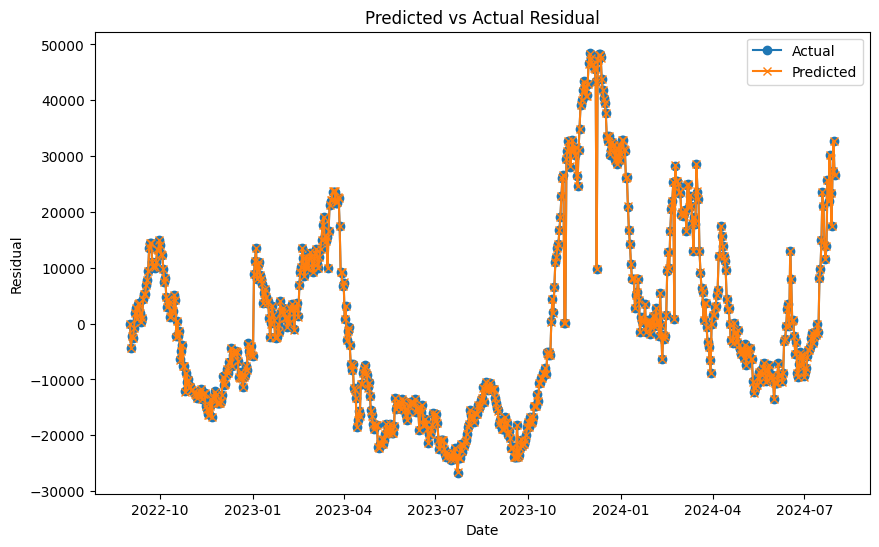

In [11]:
#Prediksi seluruh data

# Import optimizer
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
learning_rate = 0.005
batch_size = 32
epochs = 100
neurons = 40
time_step = 30

# Initialize and compile LSTM model with specified hyperparameters and learning rate
optimizer = Adam(learning_rate=learning_rate)
model = Sequential()
model.add(LSTM(neurons, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train LSTM model
model.fit(data['Residual_normalized'].values.reshape(-1, 1),
          data['Residual_normalized'].values.reshape(-1, 1),
          epochs=epochs, batch_size=batch_size, verbose=0)

# Make predictions for the entire dataset
predictions = model.predict(data['Residual_normalized'].values.reshape(-1, 1))

# Denormalize predictions
denormalized_predictions = scaler.inverse_transform(predictions)

# Plot original data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Residual'], label='Actual', marker='o')
plt.plot(data['Tanggal'], denormalized_predictions, label='Predicted', marker='x')
plt.title("Predicted vs Actual Residual")
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

In [12]:
denormalized_predictions = pd.DataFrame(denormalized_predictions, columns=['Predictions'])
denormalized_predictions

,Predictions
0,-18.982298
1,-4340.728027
2,-2175.578369
3,-2646.839600
4,-781.455872
...,...
695,23426.205078
696,17501.291016
697,27360.826172
698,32789.554688


In [13]:
from google.colab import files

denormalized_predictions.to_excel("predicted_lstm_fix.xlsx", index=False)
files.download("predicted_lstm_fix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>